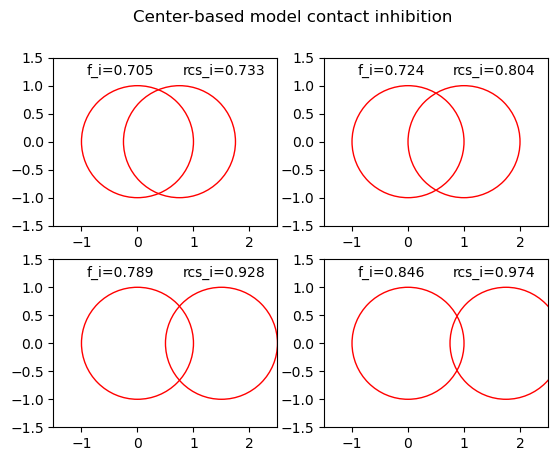

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# https://mathworld.wolfram.com/Circle-CircleIntersection.html
#fig, ax = plt.subplots(1)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots()
fig.suptitle('Center-based model contact inhibition')

x_i = 0.0
y_i = 0.0
x_j = .75
y_j = 0
r_i = 1.
r_j = 1.
ax = [ax1,ax2,ax3,ax4]
x0 = [0.75,1.0,1.5,1.75]
for idx in range(4):
    x_j = x0[idx]
    c_i = Circle((x_i, y_i), r_i, edgecolor='r', facecolor='none')
    c_j = Circle((x_j, y_j), r_j, edgecolor='r', facecolor='none')
    ax[idx].add_patch(c_i)
    ax[idx].add_patch(c_j)
    ax[idx].set_xlim(-1.5, 2.5)
    ax[idx].set_ylim(-1.5, 1.5)
    ax[idx].set_aspect('equal', adjustable='box')
    #plt.show()
    
    xd = x_j-x_i
    yd = y_j-y_i
    d_ij = np.sqrt(xd*xd + yd*yd)
    # print("d_ij = ",d_ij)
    #  *d_ij^2 - r_j^2 + r_i^2) / (2 * d_ij * r_i)
    phi_ij = ( d_ij*d_ij - r_j*r_j + r_i*r_i ) / (2 * d_ij * r_i)
    # print("phi_ij = ",phi_ij)
    # free surface fraction of cell_i
    f_i = 1.0 - 1.0/np.pi * np.sqrt( 1.0 - phi_ij*phi_ij )   # for all nbrs j:  1 - 1/pi * SUM_j (sqrt(1 - phi_ij)
    # print("f_i = ",f_i)
    ax[idx].text(-0.9, 1.2, f'f_i={f_i:.3f}', fontsize = 10)
    
    # A_i/A_i0 = 1 - 1/pi SUM_j ( arccos(phi_ij) - phi_ij * sqrt(1 - phi_ij^2) )
    relative_compressed_size = 1.0 - 1.0/np.pi * (np.arccos(phi_ij) - phi_ij * np.sqrt(1.0 - phi_ij*phi_ij))
    # print("relative_compressed_size = ",pressure2)
    ax[idx].text(0.8, 1.2, f'rcs_i={relative_compressed_size:.3f}', fontsize = 10)



pts_01 =  [(9.485670772815137, 3.1657621499033475), (4.0527907656463995, 9.14193015778896)]


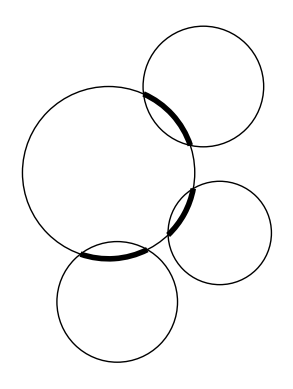

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle,Arc
import math

def circle_intersection(x0, y0, r0, x1, y1, r1):
    """
    Calculates intersection points of two circles.
    Returns None if no intersection, or a tuple of two (x, y) points.
    """
    # Distance between centers
    d = math.sqrt((x1 - x0)**2 + (y1 - y0)**2)

    # Check for no intersection (separate or one inside another)
    if d > r0 + r1 or d < abs(r0 - r1):
        return None

    # Check for coincident circles (infinite intersections - returning None)
    if d == 0 and r0 == r1:
        return None

    # Calculate 'a', distance from center 0 to radical axis intersection
    # Formula: a = (r0^2 - r1^2 + d^2) / (2*d)
    a = (r0**2 - r1**2 + d**2) / (2 * d)

    # Calculate 'h', distance from radical axis intersection to intersection points
    # Formula: h = sqrt(r0^2 - a^2)
    h = math.sqrt(r0**2 - a**2)

    # Calculate point P2 (midpoint of the chord connecting intersections)
    x2 = x0 + a * (x1 - x0) / d
    y2 = y0 + a * (y1 - y0) / d

    # Calculate the two intersection points (P3 and P4)
    # Offset P2 perpendicularly by 'h' along the line connecting centers
    ix1 = x2 + h * (y1 - y0) / d
    iy1 = y2 - h * (x1 - x0) / d
    ix2 = x2 - h * (y1 - y0) / d
    iy2 = y2 + h * (x1 - x0) / d

    # Return the two points (or one if tangent)
    if h == 0: # Tangent case (one point)
        return [(ix1, iy1)]
    else:
        return [(ix1, iy1), (ix2, iy2)]

def circle_arc(center,radius, point1,point2):
    start_angle_rad = np.arctan2(point1[1] - center[1], point1[0] - center[0])
    end_angle_rad = np.arctan2(point2[1] - center[1], point2[0] - center[0])
    # Convert to degrees for the Arc patch
    start_angle_deg = np.degrees(start_angle_rad)
    end_angle_deg = np.degrees(end_angle_rad)
    arc= Arc(center, 2 * radius, 2 * radius,  # width and height are 2*radius for a circle
                  angle=0, theta1=start_angle_deg, theta2=end_angle_deg, edgecolor='k', linewidth=4)
    return arc
    

# https://mathworld.wolfram.com/Circle-CircleIntersection.html
#fig, ax = plt.subplots(1)
fig, ax = plt.subplots(1,1)

c_0 = Circle((0,0), 10, edgecolor='k', facecolor='none')
c_1 = Circle((11,10), 7, edgecolor='k', facecolor='none')
c_2 = Circle((12.9, -7.), 6, edgecolor='k', facecolor='none')
c_3 = Circle((1,-15), 7, edgecolor='k', facecolor='none')

center=(0,0)
pts_01 = circle_intersection(0,0,10, 11,10,7)
print("pts_01 = ",pts_01)
point1 = pts_01[0]
point2 = pts_01[1]

start_angle_rad = np.arctan2(point1[1] - center[1], point1[0] - center[0])
end_angle_rad = np.arctan2(point2[1] - center[1], point2[0] - center[0])

# Convert to degrees for the Arc patch
start_angle_deg = np.degrees(start_angle_rad)
end_angle_deg = np.degrees(end_angle_rad)

radius=10
arc1 = Arc(center, 2 * radius, 2 * radius,  # width and height are 2*radius for a circle
                  angle=0, theta1=start_angle_deg, theta2=end_angle_deg, edgecolor='k', linewidth=4)  # linestyle='dashed',

#-------------------
pts = circle_intersection(0,0,10, 12.9,-7,6)
# print("--- #2 pts=",pts)
point1 = pts[0]
point2 = pts[1]
arc2 = circle_arc((0,0), 10, pts[0],pts[1])

pts = circle_intersection(0,0,10, 1,-15,7)
# print("--- #3 pts=",pts)
point1 = pts[0]
point2 = pts[1]
arc3 = circle_arc((0,0), 10, pts[0],pts[1])

#--------------------
ax.add_patch(c_0)
ax.add_patch(c_1)
ax.add_patch(c_2)
ax.add_patch(c_3)
ax.add_patch(arc1)
ax.add_patch(arc2)
ax.add_patch(arc3)



ax.set_axis_off() # Hides all axes, ticks, and labels
ax.set_aspect('equal')
ax.plot()
plt.savefig('cbm_surface_fraction.svg', format='svg')
plt.savefig("cbm_surface_fraction.png") 


plt.show()
